In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras
import pylab as pl
import numpy as np
np.random.seed(123)

# 1 Getting the data: standard handwritten digit recognition task

In [0]:
(train_input, train_labels), (test_input, test_labels) = keras.datasets.mnist.load_data()

In [33]:
print("Shape of train input: {}\nShape of train labels: {}".format(train_input.shape, train_labels.shape))

Shape of train input: (60000, 28, 28)
Shape of train labels: (60000,)


# 2 understand the input data

# task 1: print the shape of the train input and train labels

# task 2: print the label of the 10th observation

# task 3: what is the shape of train_input 1?

# task 4: plot train_inpu 1


##task1


In [34]:
print("Shape of train input: {}\nShape of train labels: {}".format(train_input.shape, train_labels.shape))

Shape of train input: (60000, 28, 28)
Shape of train labels: (60000,)


##task2

In [35]:
print('Label of the 10th observation: {}'.format(train_labels[9]))

Label of the 10th observation: 4


##task3

In [36]:
print('Shape of train_input 1: {}'.format(train_input[0].shape))

Shape of train_input 1: (28, 28)


##task4

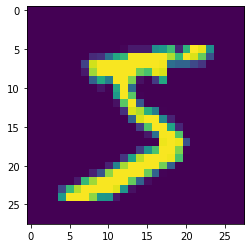

In [37]:
pl.imshow(train_input[0])

# 3 Create the model

# task5: create a model with 3 layers: input layer and 2 fully connected layers with 128 and 10 neurons respectively

In [0]:

model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation=tf.nn.sigmoid), 
                          keras.layers.Dense(10,activation=tf.nn.softmax) ])

# 4 set the hyperparameters
# task 6: set a learning rate of 0.01, a loss function "sparse_categorical_crossentropy" and set the metric to "accuracy
                                              

In [0]:
model.compile?

In [0]:
model.compile(optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [41]:
model.fit(train_input, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.6472 - acc: 0.8345
Epoch 2/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3639 - acc: 0.9028
Epoch 3/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3163 - acc: 0.9143
Epoch 4/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2890 - acc: 0.9204
Epoch 5/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2720 - acc: 0.9243


# Task 7: test the model

In [42]:
test_loss, test_acc = model.evaluate(test_input,test_labels)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.2556 - acc: 0.9290


# task 8 plot the 10'th test observation and its label and prediction

In [43]:
pred = model.predict(test_input, verbose = 1)

10000/10000 [==============================] - 0s 29us/sample


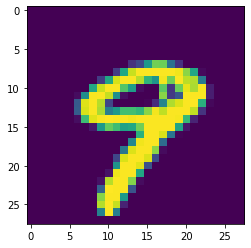

In [44]:
pl.imshow(test_input[9]);



In [45]:
print('Label of the 10th observation: {}'.format(train_labels[9]))

Label of the 10th observation: 4


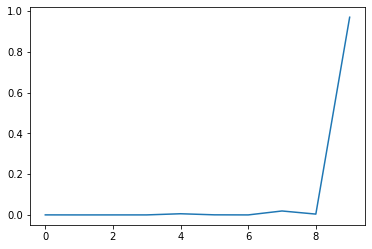

In [46]:

pl.plot(pred[9])


# task 9: find the first wrong prediction in the test set

In [47]:
for i, predict in enumerate(pred):
  if np.argmax(predict) != test_labels[i]:
    print(i)
    failure_first = i
    break

8


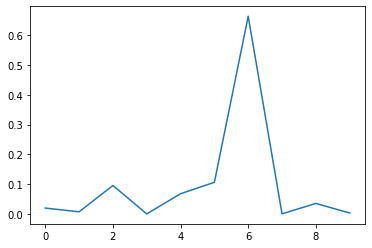

In [48]:
pl.plot(pred[failure_first])

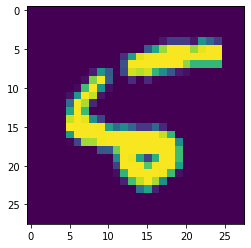

In [49]:
pl.imshow(test_input[failure_first])

In [50]:
print("Label of the first fail: {}".format(test_labels[failure_first]))

Label of the first fail: 5


##task10

In [0]:
model2 = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)), keras.layers.Dense(128, activation = tf.nn.sigmoid), keras.layers.Dense(128, activation = tf.nn.sigmoid), keras.layers.Dense(128, activation = tf.nn.sigmoid), keras.layers.Dense(128, activation = tf.nn.sigmoid), keras.layers.Dense(10, activation = tf.nn.sigmoid)])

In [60]:
model2.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(train_input, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 82us/sample - loss: 2.3010 - acc: 0.1150
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 2.2946 - acc: 0.1277
Epoch 3/5
60000/60000 [==============================] - 5s 83us/sample - loss: 2.2847 - acc: 0.1590
Epoch 4/5
60000/60000 [==============================] - 5s 82us/sample - loss: 2.2568 - acc: 0.2512
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 2.1314 - acc: 0.4072


In [61]:
test_loss2, test_acc2 = model2.evaluate(test_input,test_labels)

10000/10000 [==============================] - 0s 42us/sample - loss: 1.9559 - acc: 0.5154


In [62]:
pred2 = model2.predict(test_input, verbose = 1)

10000/10000 [==============================] - 0s 35us/sample


In [67]:
for i, predict in enumerate(pred2):
  if np.argmax(predict) != test_labels[i]:
    print(i)
    failure_first = i
    break

4


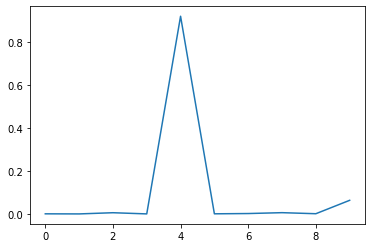

In [75]:
pl.plot(pred[failure_first])

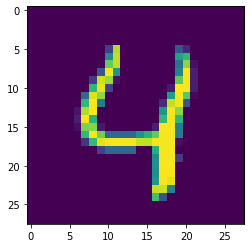

In [69]:
pl.imshow(test_input[failure_first])

In [70]:
print("Label of the first fail: {}".format(test_labels[failure_first]))

Label of the first fail: 4


I'm not sure why this is considered the first failure because the digit is clearly 4 and the label is 4. Im not sure where the code went wrong. 


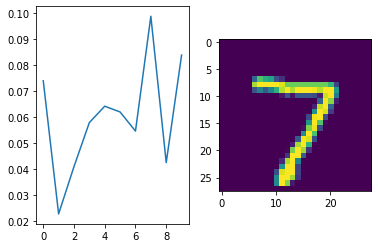

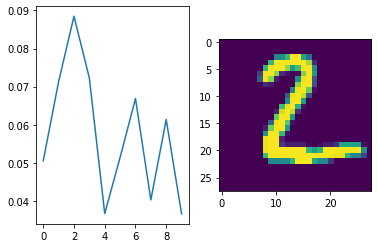

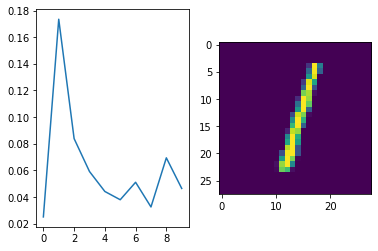

In [76]:
for i in range(3):
  pl.subplot(121)
  pl.plot(pred2[i])
  pl.subplot(122)
  pl.imshow(test_input[i])
  pl.show()

This is definitely overfitting. Looking at the prediction and observation plots above, the digits are clearly defineable, but the prediction plots are picking up a lot of noise from other digits. This is most likely because there are there are many more neurons than testing objects present. 